In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk import word_tokenize
import string
import re

Import two seperate dataframs that contain the same information.

In [81]:
df = pd.read_csv('data/wine_data1.csv')

Tasks todo:
- identify the characteristics of a 'good' wine
    - what should be considered good
    - what kinds of wine are rated the highest
    - what descriptions of wine lead to the highest rating
    - can you predict the price of the wine based on description
    - can you predict the score of the win based on description
    - is there any correlation between expensive and cheap wines
- create word clouds for:
    - descriptions of good and bad wines
    - descriptions of cheap and expensive wines

Steps from NLP notebook from class
- Text analytics and NLP
- Pre-Prosessing for NLP 
    - Tokenization
    - Stopwords removal
    - Lexicon normalization: lemmatization and stemming
- Feature Engineering for NLP
    - Bag-of-Words
    - Term frequency-Inverse Document Frequency (tf-idf)
- Text Classification
    - Use features from text to detect satire
- Next Steps/Project Ideas :)
    - Document clustering: Latent Dirichlet Allocation (LDA), Latent Semantic Analysis(LSA) 
    - Word Embeddings

### Identifying what a good wine is

In [39]:
df.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


From this I will consider a good wine to be over a 90 in points.

#### Creating a bag of words for good and bad wines

In [90]:
# seperating the wines into two dataframes of good and bad
good = df[df.points > 90]
bad = df[df.points <= 90]

In [91]:
# creating a large bag of all words contained in descriptions
#    of good and bad words
good_word_wstop = list(good.description)
bad_word_wstop = list(bad.description)

In [92]:
# joining list of descriptions into one string
good_words = ' '.join(good_word_wstop)
bad_words = ' '.join(bad_word_wstop)

In [99]:
# tokenizing each string into list of single words
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')
good_tokens = tokenizer.tokenize(good_words)
bad_tokens = tokenizer.tokenize(bad_words)

# lowercasing all words so that they match stop words
good_tokens = [x.lower() for x in good_tokens]
bad_tokens = [x.lower() for x in bad_tokens]

In [100]:
# going to remove stop words first
stop_words = set(stopwords.words('english'))
good_word_bag = []
bad_word_bag = []
# iterating through each list to not include stop words
#     could be done with zip but not consequences of good and bad
#     being different lenghts
for word in good_tokens:
    if word not in stop_words:
        good_word_bag.append(word)
for word in bad_tokens:
    if word not in stop_words:
        bad_word_bag.append(word)

In [103]:
good_fdist = FreqDist(good_word_bag)
bad_fdist = FreqDist(bad_word_bag)

In [102]:
good_fdist

FreqDist({'wine': 24454, 'flavors': 14753, 'fruit': 14434, 'tannins': 9821, 'black': 8611, 'rich': 8069, 'ripe': 7814, 'acidity': 7598, 'cherry': 7059, 'finish': 6893, ...})

TypeError: float() argument must be a string or a number, not 'FreqDist'

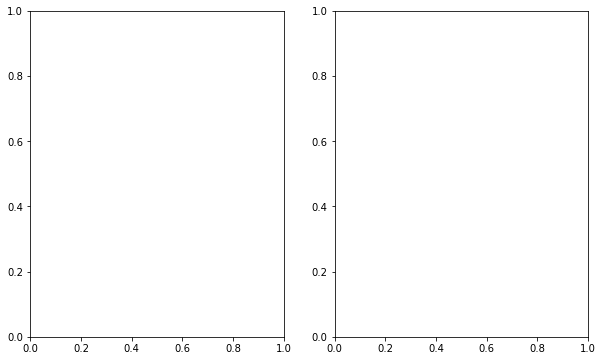

In [125]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,6))


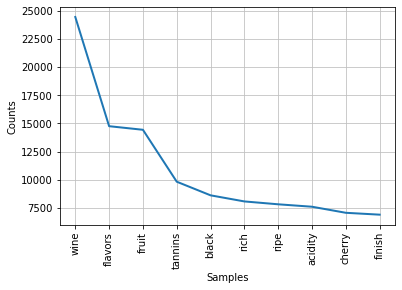

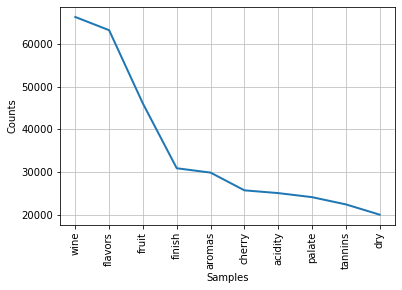

In [128]:
good_fdist.plot(10)
bad_fdist.plot(10)